# 场景

1. 市场上有一堆不同品牌的红酒，我想了解这些纷繁复杂的品牌大概有哪集大类？（Q型聚类）

2. 一瓶红酒可能有上百种化学成分，我想了解这些成分大概可以归为哪集大类？（R型聚类）

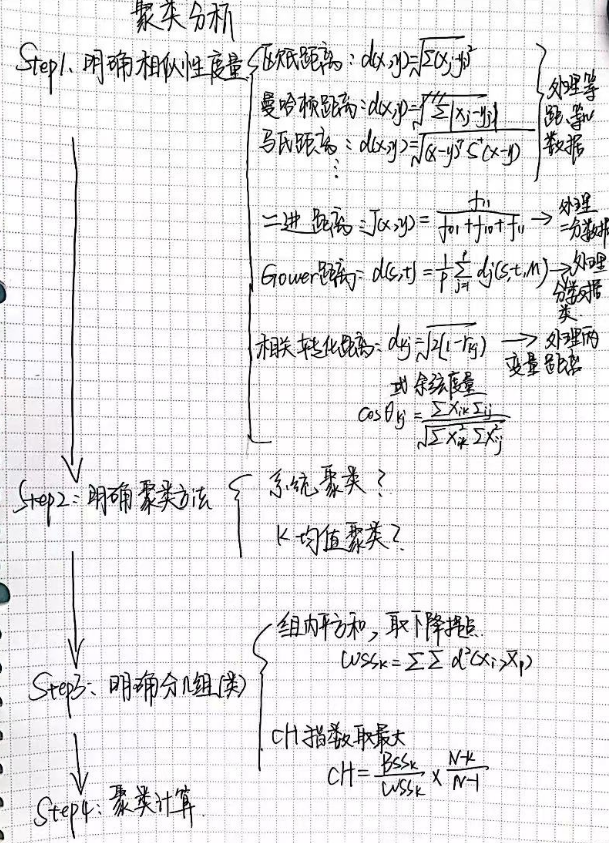

# 1. 系统聚类（也叫分层聚类）
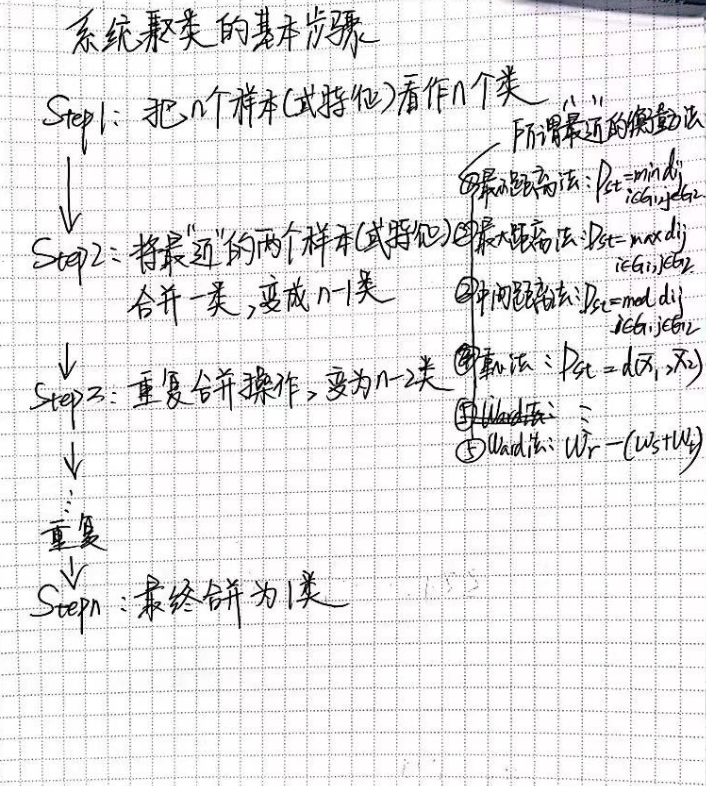
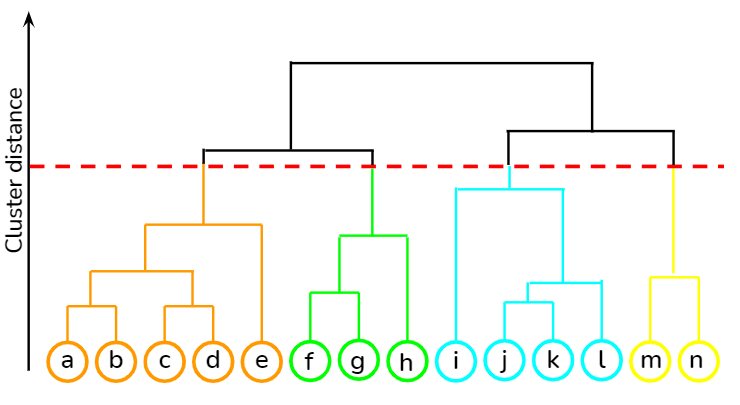

In [ ]:
# 举例： 我有一堆红酒，要求根据12种红酒指标，想要探索这一堆红酒可以分为哪些大类
winequality <- read.csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep = ";")


In [ ]:
head(winequality)
d <- scale(winequality[1:20,],T,T)
d

In [ ]:
#计算样本距离矩阵（欧式距离）
d.mat <- dist(d, method='euclidean', #euclidean 欧式距离;manhattan 曼哈顿距离。。。
              diag=TRUE, upper=F)
round(d.mat,2)

In [ ]:
# 1. 采用最短距离法聚类
res1 <- hclust(d.mat, method='single')   #single最短距离法，complete最大距离法，centrold重心法，ward Ward法。。。
res1

In [ ]:
plot(res1)

In [ ]:
# 2. 采用ward法
res2 <- hclust(d.mat, method='ward')   #single最短距离法，complete最大距离法，centrold重心法，ward Ward法。。。
plot(res2)

In [ ]:
# 举例： 我有一堆红酒，要求根据12种红酒指标，想要探索12种指标可以分为哪几大类？
cor_m <- cor(winequality)
cor_m


In [ ]:
cor_m_d <- as.dist(sqrt(2*(1-cor_m))) #as.dist()的作用是将普通矩阵转化为聚类分析能用的

In [ ]:
# 采用最短距离法聚类
res_cor <- hclust(cor_m_d, method='single')   
plot(res_cor)
rect.hclust(res_cor, k=3)

# Kmeans聚类

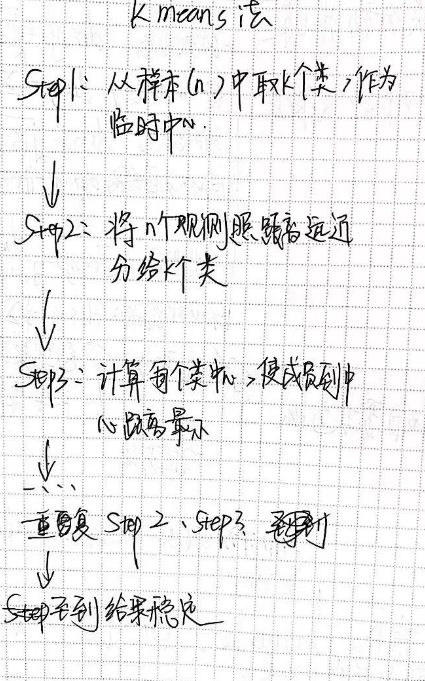
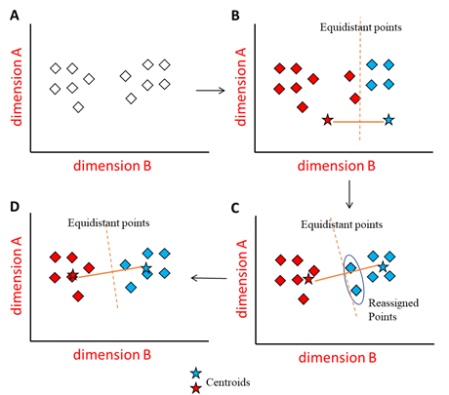

In [52]:
head(winequality)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
2,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
3,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
6,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


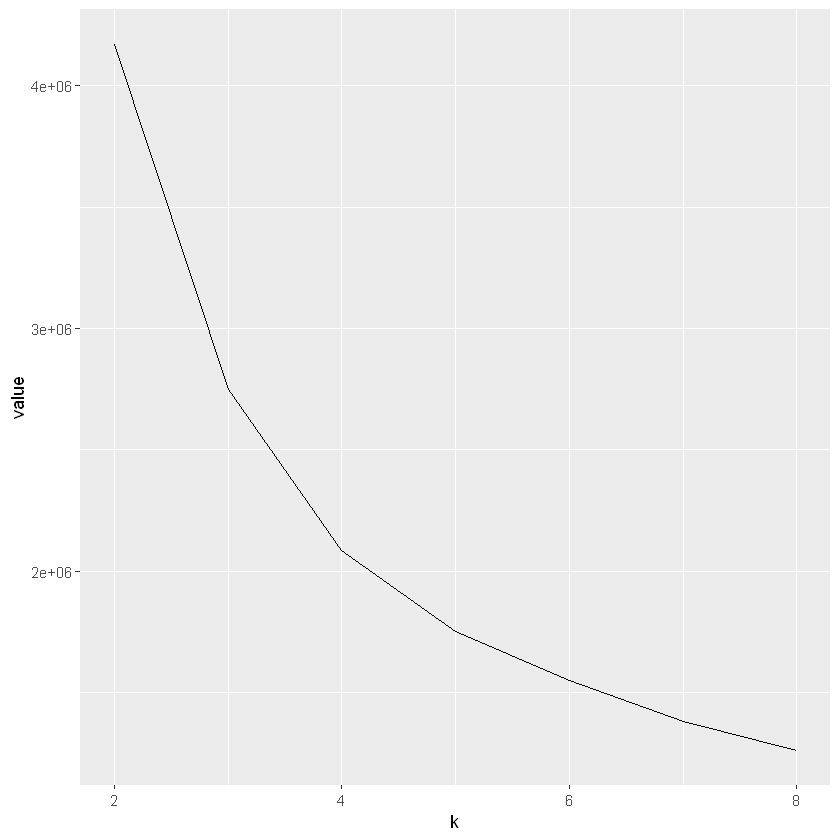

In [53]:
#组内平方和法确定k的个数
library(tidyverse)
wss <- tibble(k = 2:8) %>%
  mutate(
    value = map_dbl(k, function(i) {
      if(i==1) {
        sum(scale(winequality, scale = T)^2)
      } else {
        km  = kmeans(winequality, centers = i)
        sum(km$withinss)
      }
    })
  )
ggplot(data = wss, mapping = aes(
  x = k, y = value)) + 
  geom_line()

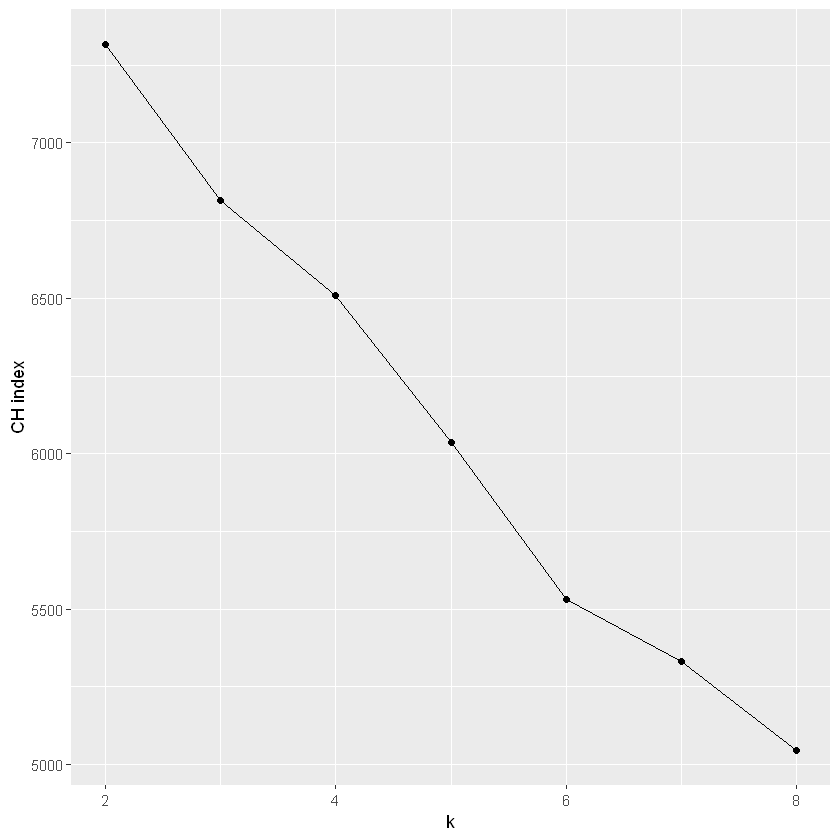

In [54]:
# CH指数确定k值
library("fpc")
library("cluster")

CH = tibble(
  k = 2:8,
  value = map_dbl(k, function(i) {
    p = kmeans(winequality, i)
    fpc::calinhara(winequality, p$cluster)
  })
)
ggplot(data = CH, mapping = aes(
  x = k, y = value)) + 
  geom_line() + 
  geom_point() +
  ylab("CH index")

In [55]:
k <- 2
res1 <- kmeans(winequality, centers=2)

In [56]:
res1

K-means clustering with 2 clusters of sizes 2100, 2798

Cluster means:
  fixed.acidity volatile.acidity citric.acid residual.sugar  chlorides
1      6.947571        0.2854000   0.3505952       8.520643 0.05056286
2      6.785150        0.2728681   0.3218799       4.793352 0.04217691
  free.sulfur.dioxide total.sulfur.dioxide   density       pH sulphates
1            46.15143             178.0186 0.9956921 3.187467 0.5038286
2            27.16976             108.5960 0.9927779 3.188867 0.4793531
    alcohol  quality
1  9.917373 5.702381
2 10.962258 6.009650

Clustering vector:
   [1] 1 2 2 1 1 2 2 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 2 1 2 1 1 2 2 2 2 2 2 2 1 2 1
  [38] 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 1 1 2 2 2 1 1 2 2 2 2 1 2 2 1 1 1 2
  [75] 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1 1
 [112] 1 1 1 1 2 2 2 1 1 2 2 2 2 1 1 2 1 1 1 2 1 1 1 1 1 2 1 2 2 2 1 2 2 2 2 1 2
 [149] 2 2 1 2 2 2 2 1 1 2 2 2 2 1 2 1 1 1 1 2 1 2 2 2 2 2 1 1 2 1 2 1 1 1 1 1 1
 [186] 1 1 2